Epoch 1/2
625/625 [==============================] - 137s 219ms/step - loss: 0.4190 - accuracy: 0.7984 - val_loss: 0.2756 - val_accuracy: 0.8852
Epoch 2/2
782/782 [==============================] - 44s 56ms/step - loss: 0.2622 - accuracy: 0.8901
Test accuracy: 0.8900799751281738


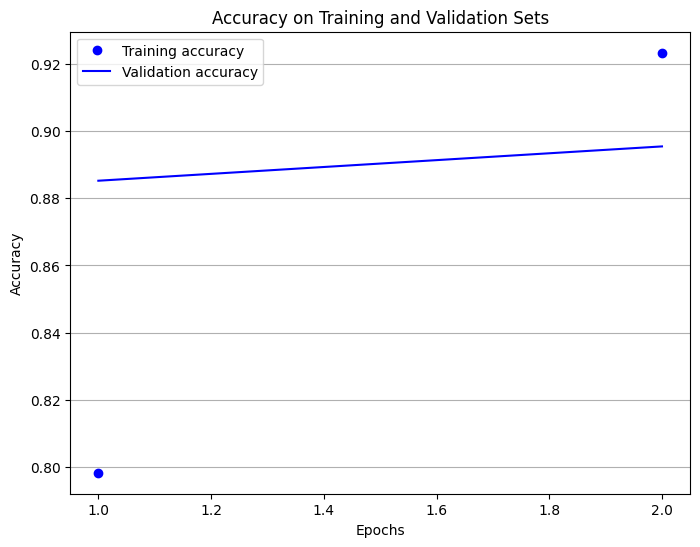

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.src.utils import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Импортируем IMDB из Keras
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Декодируем данные
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.word_index = tf.keras.datasets.imdb.get_word_index()
tokenizer.word_index = {k:(v+3) for k,v in tokenizer.word_index.items()}
tokenizer.word_index['<PAD>'] = 0
tokenizer.word_index['<START>'] = 1
tokenizer.word_index['<UNK>'] = 2  # unknown
tokenizer.word_index['<UNUSED>'] = 3

# разделяем на обучающую и валидационную выборки
train_reviews, val_reviews, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=5)

# преобразовываем текстовые данные в последовательности
max_len = 500
train_sequences = pad_sequences(train_reviews, maxlen=max_len, padding='post', truncating='post')
val_sequences = pad_sequences(val_reviews, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_data, maxlen=max_len, padding='post', truncating='post')

# создаем модель
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(train_sequences, train_labels, epochs=2, batch_size=32, validation_data=(val_sequences, val_labels))

# оцениваем на тестовой выборке
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)
print('Test accuracy:', test_accuracy)

# Рисуем график точности
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Accuracy on Training and Validation Sets')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, axis='y')
plt.show()
